In [47]:
import librosa
import librosa.display as ld
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# laoding the audio files
debussy_audio = "C:\\Users\\JAISON\\Audio_jupyter\\AudioSignalProcessingForML-master\\8- Implementing the amplitude envelope\\audio\\debussy.wav"
redhot_audio = "C:\\Users\\JAISON\\Audio_jupyter\\AudioSignalProcessingForML-master\\8- Implementing the amplitude envelope\\audio\\redhot.wav"
duke_audio = "C:\\Users\\JAISON\\Audio_jupyter\\AudioSignalProcessingForML-master\\8- Implementing the amplitude envelope\\audio\\duke.wav"


In [49]:
ipd.Audio(debussy_audio)

In [68]:
debussy, _ = librosa.load(debussy_audio)
redhot, sr = librosa.load(redhot_audio)
duke, _ = librosa.load(duke_audio)

In [69]:
debussy.size

661500

In [70]:
# duration of 1 sample
duration_sample = 1 / sr
print(f"Duration of 1 sample is: {duration_sample: .6f} seconds")

Duration of 1 sample is:  0.000045 seconds


In [72]:
# duration of the audio file
duration_audio = duration_sample * len(redhot)
duration_audio

30.0

(-1.0, 1.0)

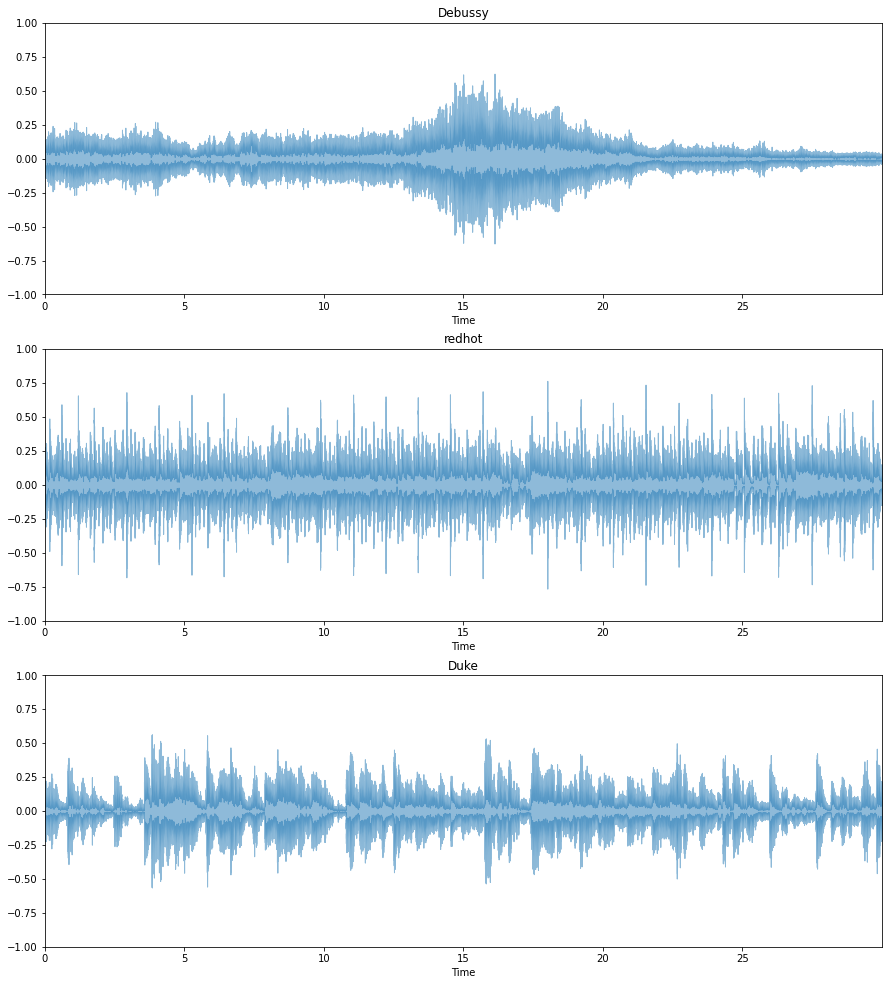

In [54]:
# visualize the waveform
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
ld.waveplot(debussy, alpha=0.5)
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
ld.waveplot(redhot, alpha=0.5)
plt.title("redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
ld.waveplot(duke, alpha=0.5)
plt.title("Duke")
plt.ylim((-1, 1))


In [58]:
def amplitude_envelope(signal, frame_size, hop_length):
    amp_env = []
    
    #calculate for each frame
    for i in range(0, len(signal), hop_length):
        curr_frame = max(signal[i:i+frame_size])
        amp_env.append(curr_frame)
        
    return np.array(amp_env)    

In [93]:
ae_debussy = amplitude_envelope(debussy, 1024, 512)
ae_redhot = amplitude_envelope(redhot, 1024, 512)
ae_duke = amplitude_envelope(duke, 1024, 512)
len(ae_duke)


1292

(-1.0, 1.0)

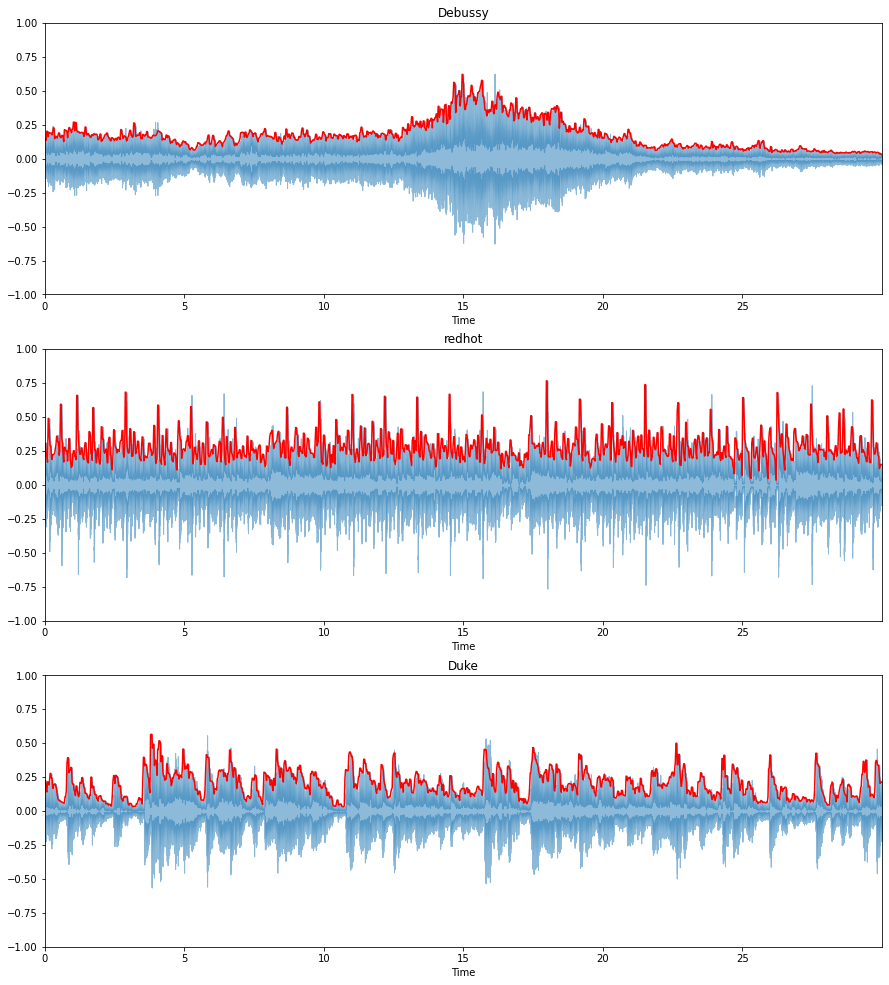

In [95]:
# visualize the amplitude envelope for all audio files

frames = range(0, ae_debussy.size)
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
ld.waveplot(debussy, alpha=0.5)
plt.plot(t, ae_debussy, color="r") 
plt.title("Debussy")
plt.ylim((-1, 1))

frames = range(0, ae_redhot.size)
t = librosa.frames_to_time(frames, hop_length=512)

plt.subplot(3, 1, 2)
ld.waveplot(redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r") 
plt.title("redhot")
plt.ylim((-1, 1))


frames = range(0, ae_duke.size)
t = librosa.frames_to_time(frames, hop_length=512)

plt.subplot(3, 1, 3)
ld.waveplot(duke, alpha=0.5)
plt.plot(t, ae_duke, color="r") 
plt.title("Duke")
plt.ylim((-1, 1))